# Grad stats 2 problem set 1

## 1. Set your current directory and download Charlie's dataset or your own data set using the "copy" command followed by "import delimited" or "use" depending on the format of your data [5 points]

In [74]:
cd "/Users/camellia/Documents/Stats 2/soc211_assignments"

copy "https://raw.githubusercontent.com/HigherEdData/Private-Equity-and-For-Profit-Colleges-as-Agile-Predators/master/agilepredatorsdata20191116.csv" ///
agilepredatorsdata20191116.csv, replace

insheet using "agilepredatorsdata20191116.csv", comma clear


/Users/camellia/Documents/Stats 2/soc211_assignments
(52 vars, 205,262 obs)


## 2. list all of the variable names in the dataset using the "ds" command with the appropriate varwidth specification [1 point]

In [75]:
ds, varwidth(29) alpha

all_under                 idx_gr                    pe_ind
all_under_w               idx_sfa                   peacqu
chain                     inst_name_new             peswitcherall
dist_black_share_w        investevent               peswitchsystemall
dist_fed_grant_pct_w      ipo                       po_ind
dist_hisp_share_w         loan_amount_borrower_c_w  poacqu
dist_pell_s               not_pe_po                 poswitcherall
dist_white_share_w        online                    poswitchsystemall
fed_grant_pct_w           owner_pe                  selective
grad_rate_150_p2yr_w      pct2yrchrtgrbkaat_w       state_n
grad_rate_150_p4yr_w      pct2yrchrtgrhispt_w       systemid
grad_rate_150_p_w         pct2yrchrtgrwhitt_w       systemnm
grtotltallgradchrt        pct4yrchrtgrbkaat_w       total_enrollment
grtotltchrt2yr            pct4yrchrtgrhispt_w       tuitionall_c_w
grtotltchrt4yr            pct4yrchrtgrwhitt_w       unitid
iclevel                   pctchrtgrbkaat_w          y

## 3. Use the help magic to print the help documenation for the **"sum"** command. If you need information on the help magic, see here: https://nbviewer.jupyter.org/github/kylebarron/stata_kernel/blob/master/examples/Example.ipynb [1 pt]

In [76]:
%help sum

<!-- END HEAD --> +----------------------------------------+ | See | For the | |-----------------+----------------------| | | | | help summarize | summarize command | | | | | help sum() | sum() function | | | | +----------------------------------------+ <!-- BEGIN FOOT -->


## 4. Use the **"drop"** command with an **if statement** to drop schools if they are **state**, **community**, or **non-proft** in the **owner_pe** variable. Use the "keep" command and an if statement to only keep observations if the year is 2014, then use the summarize command with the **"detail"** specification to summarize the variable **"dist_pell_s"**. This variable measures a school's Pell Grant revenue per student. If you are working with your own data, use the **drop, keep, and summarize** commands to narrow your dataset in some systematic way and summarize an **interval ratio** variable. [5 pts]
[Explain narrowing choices for your own dataset here, or interpret the meaning of the for-profit college narrowing here]

3,641 private schools (Private equity, Privately held, Publicly traded) received Pell grant revenue in 2014.
I removed state, community, and non-profit colleges from the smaple and I restricted the data to the year 2014, removing data before anad after that year. The result was that 3,641 for-profit colleges received Pell Grants.

In [78]:
label var owner_pe "ownership form"

In [80]:
codebook owner_pe


-------------------------------------------------------------------------------
owner_pe                                                         ownership form
-------------------------------------------------------------------------------

                  Type: String (str15)

         Unique values: 6                         Missing "": 0/205,262

            Tabulation: Freq.  Value
                       41,264  "Community"
                       66,188  "Non-profit"
                        6,799  "Private equity"
                       59,220  "Privately held"
                       11,559  "Publicly traded"
                       20,232  "State"



In [81]:
drop if owner_pe=="State"

(20,232 observations deleted)


In [82]:
drop if owner_pe=="Community"

(41,264 observations deleted)


In [83]:
drop if owner_pe=="Non-profit"

(66,188 observations deleted)


In [84]:
keep if year==2014

(73,937 observations deleted)


In [85]:
sum dist_pell_s, detail


                         dist_pell_s
-------------------------------------------------------------
      Percentiles      Smallest
 1%            0              0
 5%     1527.947              0
10%     2359.255              0       Obs               3,318
25%     3344.478              0       Sum of wgt.       3,318

50%     4332.054                      Mean            5125.71
                        Largest       Std. dev.      3526.453
75%     5597.208       17901.14
90%     8209.691       17901.14       Variance       1.24e+07
95%      14850.2       17901.14       Skewness        2.27957
99%     17901.14       17901.14       Kurtosis       8.685116


In [86]:
tab owner_pe


 ownership form |      Freq.     Percent        Cum.
----------------+-----------------------------------
 Private equity |        552       15.16       15.16
 Privately held |      2,167       59.52       74.68
Publicly traded |        922       25.32      100.00
----------------+-----------------------------------
          Total |      3,641      100.00


## 5. Create 1) a histogram and 2) a boxplot to visualize the distribution of Pell Grant revenue (or an interval ratio variable from your own dataset) in the following code cell. Then interpret the distributions in this markdown cell [3 pts]
[YOUR INTERPRETATION HERE]

In [87]:
help histogram


[R] histogram -- Histograms for continuous and categorical variables
                 (View complete PDF manual entry)


Syntax
------

        histogram varname [if] [in] [weight] [, [continuous_opts |
                  discrete_opts] options]

    continuous_opts                     Description
    -------------------------------------------------------------------------
    Main
      bins(#)                           set number of bins to #
      width(#)                          set width of bins to #
      start(#)                          set lower limit of first bin to #
    -------------------------------------------------------------------------

    discrete_opts                       Description
    -------------------------------------------------------------------------
    Main
      discrete                          specify that data are discrete
      width(#)                          set width of bins to #
      start(#)                          set theoretical minim

(bin=35, start=0, width=511.46116)


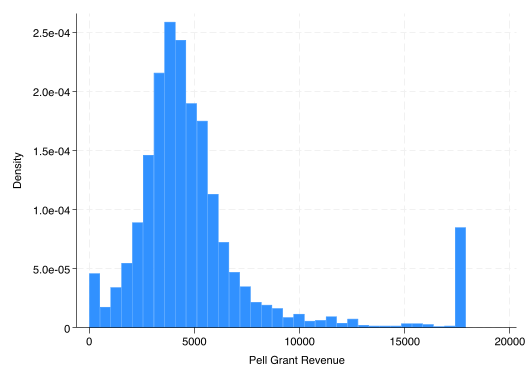

In [115]:
histogram dist_pell_s, xtitle(Pell Grant Revenue)

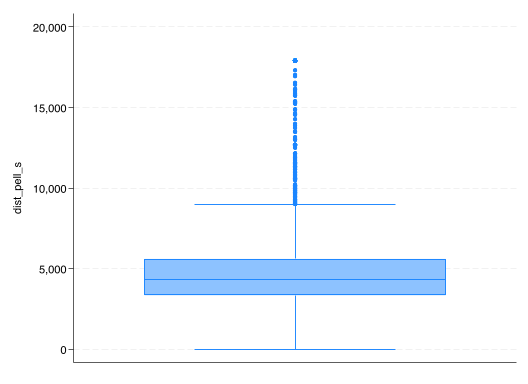

In [89]:
graph box dist_pell_s

## 6. Students at for-profit colleges have especially poor graduation rates at 4-year degree schools. In Eaton(2020) and Eaton, Howell, & Yannelis (2019), I've argued argued that for-profit colleges are more predatory under publicly traded and private equity ownership. Based on this theory, write a hypothesis about the relationship between whether a school offers 4-year or lower degrees and for-profit college ownership. Explain what is the independent variable and dependent variable and why? If you are working with your own data, do the same for a relationship between two **nominal** variables in your data. [4 pts]
1. For-profit college ownerships that are under publicly traded and private equity ownership are more predatory, and they offer more lower than 4 years degrees that are more predetory in nature.
2. Ownership type is the independent variable and impacts the dependent variable of degree level offerings. This directly has an influence on the amount of tuitions charged, which then affects the the rate of degree. This happens due to the level of degree offerings (iclevel) being dependent on the ownership form of the schools (owner_pe).

## 7. Create a frequency table for colleges by their **level of degree offerings (iclevel)** and **ownership form (owner_pe)**. Make sure the dependent variable is listed first, making its values the row values. Stata doesn't like string variables, so use the commande **encode** with the **gen** specification to create encoded **iclevel2** and **owner_pe2** variables to use. If you are working with your own data, do the same for the two variables you hypothesized about. [3 pts]

In [90]:
help encode


[D] encode -- Encode string into numeric and vice versa
              (View complete PDF manual entry)


Syntax
------

    String variable to numeric variable

        encode varname [if] [in] , generate(newvar) [label(name) noextend]


    Numeric variable to string variable

        decode varname [if] [in] , generate(newvar) [maxlength(#)]


Menu
----

    encode
    ------

        Data > Create or change data > Other variable-transformation commands
            > Encode value labels from string variable

    decode
    ------

        Data > Create or change data > Other variable-transformation commands
            > Decode strings from labeled numeric variable


Description
-----------

    encode creates a new variable named newvar based on the string variable 
    varname, creating, adding to, or just using (as necessary) the value
    label newvar or, if specified, name.  Do not use encode if varname
    contains numbers that merely happen to be stored as strings; instead, u

In [91]:
encode iclevel, generate(iclevel2)

In [92]:
describe iclevel


Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
iclevel         str35   %35s                  


In [93]:
describe iclevel2


Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
iclevel2        long    %35.0g     iclevel2   


In [94]:
encode owner_pe, generate(owner_pe2)

In [95]:
describe owner_pe2


Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
owner_pe2       long    %15.0g     owner_pe2
                                              ownership form


In [96]:
tab iclevel2 owner_pe2


                      |          ownership form
             iclevel2 | Private e  Privately  Publicly  |     Total
----------------------+---------------------------------+----------
At least 2 but less t |       216        612        232 |     1,060 
   Four or more years |       104        191        495 |       790 
Less than 2 years (be |       232      1,364        195 |     1,791 
----------------------+---------------------------------+----------
                Total |       552      2,167        922 |     3,641 


## 7. Create a horizontal bar graph using the **graph hbar** command with the **over** specification to plot the percentage of schools with degree levels within each ownership form. Use the **xi** command with the **noomit** option to create a dummy variable for iclevel. Do the same with your variables of interest if you are using your own data. [3 pts]

In [100]:
help graph hbar


[G-2] graph bar -- Bar charts
                   (View complete PDF manual entry)


Syntax
------

        graph bar  yvars [if] [in] [weight] [, options]

        graph hbar yvars [if] [in] [weight] [, options]


    where yvars is
                   (asis) varlist

    or is
                   (percent) [varlist] | (count) [varlist]

    or is
                   [(stat)] varname               [[(stat)] ...]
                   [(stat)] varlist               [[(stat)] ...]
                   [(stat)] [name=]varname [...]  [[(stat)] ...]

    where stat may be any of

                    mean median p1 p2 ... p99 sum count percent min max

    or
                    any of the other stats defined in [D] collapse

    yvars is optional if the option over(varname) is specified.  percent is
    the default statistic, and percentages are calculated over varname.

    mean is the default when varname or varlist is specified and stat is not
    specified.  p1 means the first percentile, p2 m

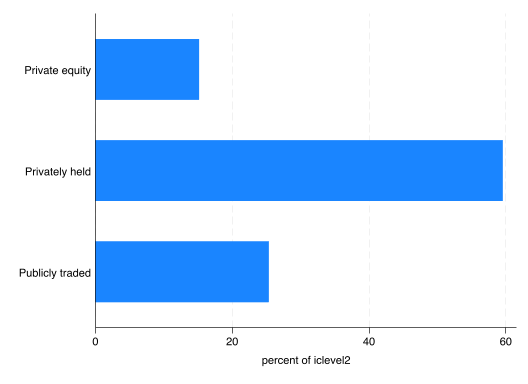

In [102]:
graph hbar (percent)iclevel2, over(owner_pe2)

In [103]:
help xi


[R] xi -- Interaction expansion
          (View complete PDF manual entry)


Syntax
------

        xi [, prefix(string) noomit] term(s)

        xi [, prefix(string) noomit] : any_stata_command varlist_with_terms
              ...

    where a term has the form

        i.varname                     or       I.varname
        i.varname1*i.varname2                  I.varname1*I.varname2
        i.varname1*varname3                    I.varname1*varname3
        i.varname1|varname3                    I.varname1|varname3

    varname, varname1, and varname2 denote numeric or string categorical
    variables.  varname3 denotes a continuous, numeric variable.


Menu
----

    Data > Create or change data > Other variable-creation commands >
        Interaction expansion


    +-----------------------------------------------------------------+
    | Most commands in Stata now allow factor variables; see          |
    | fvvarlist. To determine if a command allows factor variables,   |
    |

In [104]:
xi i.iclevel, noomit

In [105]:
ds

unitid        online        grad_rat~p_w  pct4yrc~at_w  peswitcher~l
year          total_enro~t  grad_r~2yr_w  pct4yrc~pt_w  peswitchsy~l
iclevel       grtotltc~4yr  grad_r~4yr_w  pct4yrc~tt_w  poswitcher~l
idx_ef        grtotltc~2yr  all_under_w   state_n       poswitchsy~l
idx_f         grtotltall~t  tuitionall~w  not_pe_po     iclevel2
idx_sfa       all_under     fed_grant_~w  peacqu        owner_pe2
idx_gr        chain         pctchrtgrb~w  poacqu        _Iiclevel_1
selective     investevent   pctchrtgrw~w  dist_pell_s   _Iiclevel_2
systemid      pe_ind        pctchrtgrh~w  dist_black~w  _Iiclevel_3
systemnm      po_ind        pct2yrc~at_w  dist_white~w
ipo           inst_name_~w  pct2yrc~pt_w  dist_hisp_~w
owner_pe      loan_amoun~w  pct2yrc~tt_w  dist_fed_g~w


In [106]:
tab _Iiclevel_3


iclevel==Le |
  ss than 2 |
      years |
     (below |
 associate) |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |      1,850       50.81       50.81
          1 |      1,791       49.19      100.00
------------+-----------------------------------
      Total |      3,641      100.00


In [107]:
tab _Iiclevel_2


iclevel==Fo |
 ur or more |
      years |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |      2,851       78.30       78.30
          1 |        790       21.70      100.00
------------+-----------------------------------
      Total |      3,641      100.00


In [108]:
tab _Iiclevel_1


iclevel==At |
least 2 but |
less than 4 |
      years |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |      2,581       70.89       70.89
          1 |      1,060       29.11      100.00
------------+-----------------------------------
      Total |      3,641      100.00


In [109]:
tab iclevel


                            iclevel |      Freq.     Percent        Cum.
------------------------------------+-----------------------------------
   At least 2 but less than 4 years |      1,060       29.11       29.11
                 Four or more years |        790       21.70       50.81
Less than 2 years (below associate) |      1,791       49.19      100.00
------------------------------------+-----------------------------------
                              Total |      3,641      100.00


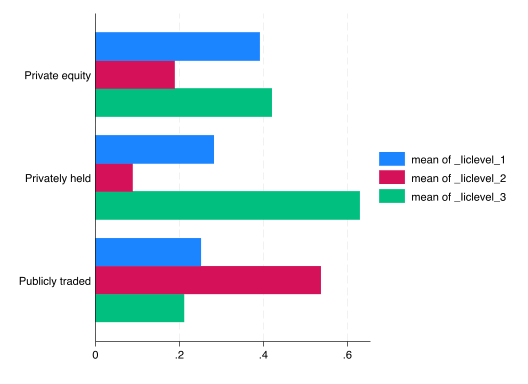

In [116]:
graph hbar _Iiclevel_*, over(owner_pe)

## 8. Provide your interpretation of the results from the bivariate frequency table and the bar graph. Is there a relationship between ownership form and offering higher degrees? Or in your own variables if using your own data? What is the relationship in your own words, and does it fit your hypothesis?
The highest average of less than two year degree is rewarded by privately held schools, and degrees that require four or more years are rewarded the most by publicly traded colleged. Degrees requiring at least two years are offered by the private equity sector. This shows that private equity and privately held colleges are possibly more likely to be involved in predation whereas publicly traded colleges are not as likely to do so because of the bigger number of four or more year degrees awarded.

## 9. Private equity and publicly traded ownership may lead to more predation. But privately held colleges can be predatory too. Within each ownership form, those colleges that are operated by chains may also be more likely to be predatory. Use the **chain** variable to generate another set of bivariate tables and bargraphs for **degree level (iclevel)** and **chain ownership** and for **chain ownership (chain)** and **ownership form (owner_pe)**. Do the same if you think there is another intervening variable in your own data. Then report your interpretation [5 pts]
As shown in the distribution of the mean of chain ownership, distribution across the degree levels offered at schools, apart from schools that offer less then 2 year degrees and which are less likely to be under chain ownership. In the mean distribution of chain ownership across ownership types, private equity is likely to be under chain ownership while privately held ownership is more likely not to be under chain ownership. 

[record your interpretation here]

In [118]:
tab iclevel chain


                      |         chain
              iclevel |         0          1 |     Total
----------------------+----------------------+----------
At least 2 but less.. |       455        605 |     1,060 
   Four or more years |       147        643 |       790 
Less than 2 years (.. |     1,152        639 |     1,791 
----------------------+----------------------+----------
                Total |     1,754      1,887 |     3,641 


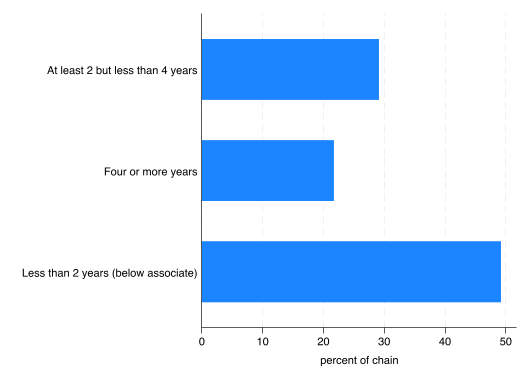

In [119]:
graph hbar (percent)chain, over(iclevel)

In [120]:
tab owner_pe chain


                |         chain
 ownership form |         0          1 |     Total
----------------+----------------------+----------
 Private equity |        29        523 |       552 
 Privately held |     1,721        446 |     2,167 
Publicly traded |         4        918 |       922 
----------------+----------------------+----------
          Total |     1,754      1,887 |     3,641 


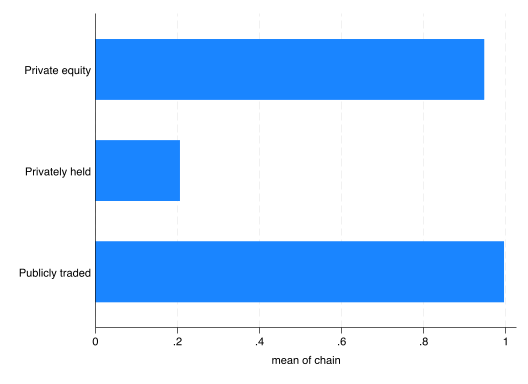

In [117]:
graph hbar chain, over(owner_pe)

## 10. Lastly, use **chain ownership** or the relevant variable for your own data as a control variable by 1) adding the specification "bysort iclevel:" before the "tab command" and 2) adding a "by(iclevel)" specification to the end of the graph command. Interpret the results [5 pts]
According to the data, private equity and publicly traded colleges are more likely to have chains. Privately held schools are less likely to be a chain if privately held colleges offer degrees requiring less than 2 years. However, the increase in years also inclreases the possibility of becoming a chain. Privately held schools are not as likely to be a chain as private equity and publicly traded schools. This shows the lack of sufficient evidence to support my hypothesis.


In [121]:
help bysort


[D] by -- Repeat Stata command on subsets of the data
          (View complete PDF manual entry)


Syntax
------

        by varlist: stata_cmd

        bysort varlist: stata_cmd

    The above diagrams show by and bysort as they are typically used.  The
    full syntax of the commands is

        by varlist1 [(varlist2)] [, sort rc0]:  stata_cmd

        bysort varlist1 [(varlist2)] [, rc0]:  stata_cmd


Description
-----------

    Most Stata commands allow the by prefix, which repeats the command for
    each group of observations for which the values of the variables in 
    varlist are the same.  by without the sort option requires that the data
    be sorted by varlist; see [D] sort.

    Stata commands that work with the by prefix indicate this immediately
    following their syntax diagram by reporting, for example, "by is allowed;
    see [D] by" or "bootstrap, by, etc., are allowed; see prefix".

    by and bysort are really the same command; bysort is just by with the
    s

In [122]:
bysort iclevel: tab chain


-------------------------------------------------------------------------------
-> iclevel = At least 2 but less than 4 years

      chain |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |        455       42.92       42.92
          1 |        605       57.08      100.00
------------+-----------------------------------
      Total |      1,060      100.00

-------------------------------------------------------------------------------
-> iclevel = Four or more years

      chain |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |        147       18.61       18.61
          1 |        643       81.39      100.00
------------+-----------------------------------
      Total |        790      100.00

-------------------------------------------------------------------------------
-> iclevel = Less than 2 years (below associate)

      chain |      Freq.     Percent        Cum.
------------+-